# Многорукие бандиты для Кредитного скоринга

Цель состоит в том, чтобы создать автоматическую систему обучения с подкреплением для управления системой выдачи кредитов.
Идея состоит в том, что когда клиент обращается в банк с просьбой о кредите, система выдает его (действие 1) или нет (действие 0).
Поэтому система обучения с подкреплением имеет **два возможных действия**.

С другой стороны, полученная награда:

- 0, если система решает не предлагать кредит клиенту
- 1, если вам предложили кредит и вы **оплатили его**
- -10, если вам предложили кредит и вы **не платите его**

Для построения системы у нас есть следующий набор данных:
https://drive.google.com/file/d/1TdTDAjndt5sn_7HKwc1PifcaQTRNHzkR/view?usp=sharing


Он загружен и отображается ниже:

In [1]:
import pandas as pd
import warnings

pd.options.display.max_colwidth = 200
warnings.filterwarnings("ignore")

**Информация о каждой переменной:**

In [2]:
info_variables = pd.read_excel("DataDictionary.xlsx")
info_variables

,Variable Name,Description,Type
0,SeriousDlqin2yrs,Лицо имело просроченную задолженность на 90 дней или более,Y/N
1,RevolvingUtilizationOfUnsecuredLines,"Общий остаток по кредитным картам и личным кредитным линиям, за исключением недвижимости и задолженности без рассрочки, например, автокредитов, деленный на сумму кредитных лимитов",percentage
2,age,Возраст заемщика в годах,integer
3,NumberOfTime30-59DaysPastDueNotWorse,"Количество раз, когда заемщик просрочил платеж на 30–59 дней, но не больше, за последние 2 года.",integer
4,DebtRatio,"Ежемесячные выплаты по долгам, алименты, расходы на проживание, деленные на ежемесячный валовой доход",percentage
5,MonthlyIncome,Ежемесячный доход,real
6,NumberOfOpenCreditLinesAndLoans,"Количество открытых кредитов (кредиты с рассрочкой платежа, например, автокредит или ипотека) и кредитных линий (например, кредитные карты)",integer
7,NumberOfTimes90DaysLate,Количество просрочек заемщика на 90 дней и более.,integer
8,NumberRealEstateLoansOrLines,"Количество ипотечных кредитов и кредитов на недвижимость, включая кредитные линии под залог жилья",integer
9,NumberOfTime60-89DaysPastDueNotWorse,"Количество раз, когда заемщик просрочил платеж на 60–89 дней, но не больше за последние 2 года.",integer


**База данных:**

In [3]:
df = pd.read_csv("./cs.csv")
df.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [4]:
df.describe().T[["count", "min", "max", "mean", "std"]]

,count,min,max,mean,std
SeriousDlqin2yrs,150000.0,0.0,1.0,0.066840,0.249746
RevolvingUtilizationOfUnsecuredLines,150000.0,0.0,50708.0,6.048438,249.755371
age,150000.0,0.0,109.0,52.295207,14.771866
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.0,98.0,0.421033,4.192781
DebtRatio,150000.0,0.0,329664.0,353.005076,2037.818523
MonthlyIncome,120269.0,0.0,3008750.0,6670.221237,14384.674215
NumberOfOpenCreditLinesAndLoans,150000.0,0.0,58.0,8.452760,5.145951
NumberOfTimes90DaysLate,150000.0,0.0,98.0,0.265973,4.169304
NumberRealEstateLoansOrLines,150000.0,0.0,54.0,1.018240,1.129771
NumberOfTime60-89DaysPastDueNotWorse,150000.0,0.0,98.0,0.240387,4.155179


In [5]:
df.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [6]:
(df["MonthlyIncome"].isna() & df["NumberOfDependents"].isna()).sum()

3924

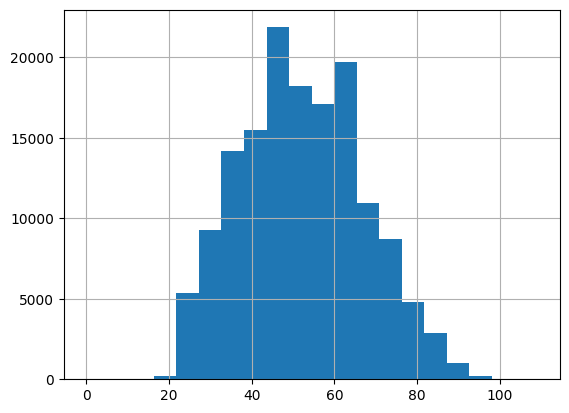

In [7]:
df["age"].hist(bins=20);

In [8]:
df["NumberOfTime30-59DaysPastDueNotWorse"].value_counts()

NumberOfTime30-59DaysPastDueNotWorse
0     126018
1      16033
2       4598
3       1754
4        747
5        342
98       264
6        140
7         54
8         25
9         12
96         5
10         4
12         2
13         1
11         1
Name: count, dtype: int64

In [9]:
# базовая чистка:
#
#1- Удаляем строки с пропущенными значениями (MonthlyIncome и NumberOfDependents)
#2- У нас останавливаются только люди от 18 до 70 лет (включительно)
# 3. Мы удаляем строки, в которых есть 96 или 98 в запаздывающих столбцах.
# (NumberOfTime30-59DaysPastDueNotWorse, NumberOfTime60-89DaysPastDueNotWorse, NumberOfTimes90DaysLate)

df.dropna(inplace=True)
df = df[ (df["age"]>=18) & (df["age"]<=70) ]

df = df[ ~df["NumberOfTime30-59DaysPastDueNotWorse"].isin([96, 98]) ]
df = df[ ~df["NumberOfTime60-89DaysPastDueNotWorse"].isin([96, 98]) ]
df = df[ ~df["NumberOfTimes90DaysLate"].isin([96, 98]) ]

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,107883.0,0.073728,0.261329,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,107883.0,6.262285,268.425237,0.0,0.042982,0.206481,0.617870,50708.0
age,107883.0,48.343835,11.909195,21.0,39.000000,49.000000,58.000000,70.0
NumberOfTime30-59DaysPastDueNotWorse,107883.0,0.276781,0.739606,0.0,0.000000,0.000000,0.000000,13.0
DebtRatio,107883.0,27.426863,395.986811,0.0,0.162018,0.308917,0.493251,60212.0
MonthlyIncome,107883.0,6800.816625,14941.921271,0.0,3500.000000,5500.000000,8344.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,107883.0,8.774265,5.155074,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,107883.0,0.098588,0.509666,0.0,0.000000,0.000000,0.000000,17.0
NumberRealEstateLoansOrLines,107883.0,1.095233,1.157615,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,107883.0,0.072106,0.348840,0.0,0.000000,0.000000,0.000000,11.0


Столбец **SeriousDlqin2yrs** имеет значение 0, если клиент выплачивает кредит, и 1, если клиент его не выплачивает.

Теперь разделим набор данных на обучающий и тестовый:

In [11]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, random_state=1, test_size=0.3, stratify=df["SeriousDlqin2yrs"])

In [12]:
# частота неплатежей за обучение и тестирование (в процентах от 1):

df_train["SeriousDlqin2yrs"].mean(), df_test["SeriousDlqin2yrs"].mean()

(0.07373076617495167, 0.073721612853391)

In [13]:
# Я определяю класс клиентов:

class clientes:
    def __init__(self, df, penalty = -10): # self: внутренние параметры
        # мой класс будет иметь два внутренних параметра:
        # i, df
        self.i = -1 # i: бухгалтер (клиентов); индекс к последнему показанному клиенту
        self.df = df
        self.penalty = penalty
    def cliente(self): # Он будет имитировать прибытие клиента
        self.i = self.i + 1
        if self.i == len(self.df):
            self.i = 0
    def get_context(self): # вы собираетесь извлечь данные из этого клиента
        return self.df.iloc[self.i].drop("SeriousDlqin2yrs")
    def get_reward(self, action): # вознаграждение с этим клиентом
        # Я рассчитываю вознаграждение:
        if action==0: # не отдавай должное
            return 0
        # кредит предоставляется:
        if self.df.iloc[self.i]["SeriousDlqin2yrs"] == 1: # не платит
            return self.penalty
        return 1 # платить
    
    def getBestReward(self):
        return max(self.get_reward(0), self.get_reward(1))

In [14]:
# клиентов: класс
# cl_train: экземпляр этого класса
#cl_test: еще один экземпляр этого класса
#
# мы можем видеть cl_train как «коробку», в которой у нас есть
# поместите набор обучающих данных, и там будет
# методы, которые позволяют мне взаимодействовать с ним
#
# То же самое с cl_test, но для тестовых данных

cl_train = clientes(df_train)
cl_test  = clientes(df_test)

In [15]:
cl_train.cliente() # Я моделирую приход нового клиента

In [16]:
cl_train.get_context()

RevolvingUtilizationOfUnsecuredLines        0.064833
age                                        59.000000
NumberOfTime30-59DaysPastDueNotWorse        0.000000
DebtRatio                                   0.156957
MonthlyIncome                           16666.000000
NumberOfOpenCreditLinesAndLoans             5.000000
NumberOfTimes90DaysLate                     0.000000
NumberRealEstateLoansOrLines                1.000000
NumberOfTime60-89DaysPastDueNotWorse        0.000000
NumberOfDependents                          2.000000
Name: 135262, dtype: float64

In [17]:
cl_train.get_context().values

array([6.48325870e-02, 5.90000000e+01, 0.00000000e+00, 1.56956861e-01,
       1.66660000e+04, 5.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 2.00000000e+00])

In [18]:
cl_train.cliente()
cl_train.get_context()

RevolvingUtilizationOfUnsecuredLines       0.209079
age                                       30.000000
NumberOfTime30-59DaysPastDueNotWorse       0.000000
DebtRatio                                  0.129946
MonthlyIncome                           2400.000000
NumberOfOpenCreditLinesAndLoans            7.000000
NumberOfTimes90DaysLate                    0.000000
NumberRealEstateLoansOrLines               0.000000
NumberOfTime60-89DaysPastDueNotWorse       0.000000
NumberOfDependents                         0.000000
Name: 14308, dtype: float64

In [19]:
cl_train.get_reward(0)

0

In [20]:
cl_train.getBestReward()

1

# **Задачи, которые необходимо выполнить**

### Задача 1. Рассчитайте эволюцию общего вознаграждения и общего сожаления при обучении:
1. Случайный алгоритм
2. Алгоритм, который всегда отдает должное
3. Алгоритм, который никогда не отдает должное

Рассчитайте эволюцию вашего среднего вознаграждения и среднего сожаления на другом графике. Имеют ли результаты смысл?

In [21]:
from tqdm import tqdm
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc('figure', figsize=(15, 4))
np.random.seed(1234)

available_actions = [0,1] #Дать или нет кредит

In [22]:
def makePlots(reward_total_vec, reward_promedio, regret_total_vec, regret_promedio):
    plt.subplot(1,2,1)
    plt.plot(reward_promedio, label = 'Reward среднее', c = 'red')
    plt.plot(regret_promedio, label = 'Regret среднее ', c = 'blue')
    plt.title("Эволюция среднего Reward и Regret")
    plt.legend()
    plt.grid()

    plt.subplot(1,2,2)
    plt.plot(reward_total_vec, label = 'Общая сумма Reward', c = 'red')
    plt.plot(regret_total_vec, label = 'Общая сумма Regret', c = 'blue')
    plt.title("Эволюция общей суммы Reward и Regred")
    plt.legend()
    plt.grid()

#### 1. Случайный алгоритм

In [23]:
N = 10_000

100%|██████████| 10000/10000 [00:00<00:00, 17762.03it/s]


Reward promedio: 0.1548
Regret promedio: 0.7775


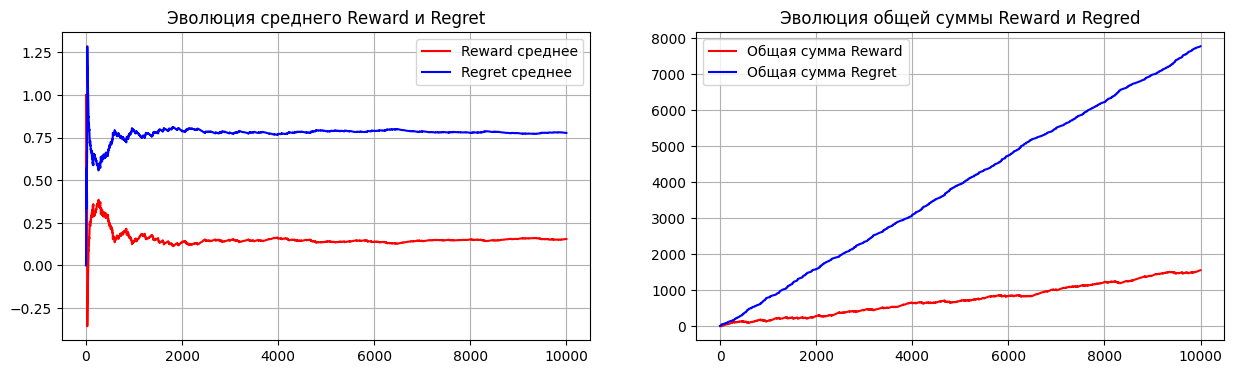

In [24]:
# Reward
reward_promedio = []
reward_total = 0
reward_total_vec = []

#Regret
regret_promedio = []
regret_total = 0
regret_total_vec = []

for i in tqdm(range(N)):
    cl_train.cliente()
    action = np.random.choice(len(available_actions))
    reward = cl_train.get_reward(action)
    reward_total += reward
    regret = cl_train.getBestReward()-reward
    regret_total += regret
    reward_promedio.append(reward_total/(i+1)) # i+1 — количество итераций
    reward_total_vec.append(reward_total)
    regret_promedio.append(regret_total/(i+1))
    regret_total_vec.append(regret_total)


print("Reward promedio:", reward_total/N)
print("Regret promedio:", regret_total/N)
makePlots(reward_total_vec, reward_promedio, regret_total_vec, regret_promedio)

**ОТВЕТ:** Полученные графики представляют случайное поведение (что является отправной точкой). Полученные графики являются ожидаемыми, имеющими в среднем гораздо большее сожаление, чем вознаграждение, это связано с тем, что давать кредит очень дорого (-10) и клиент не платит.

#### 2. Алгоритм, который всегда отдает должное

100%|██████████| 10000/10000 [00:00<00:00, 22173.14it/s]


Reward promedio: 0.1574
Regret promedio: 0.766


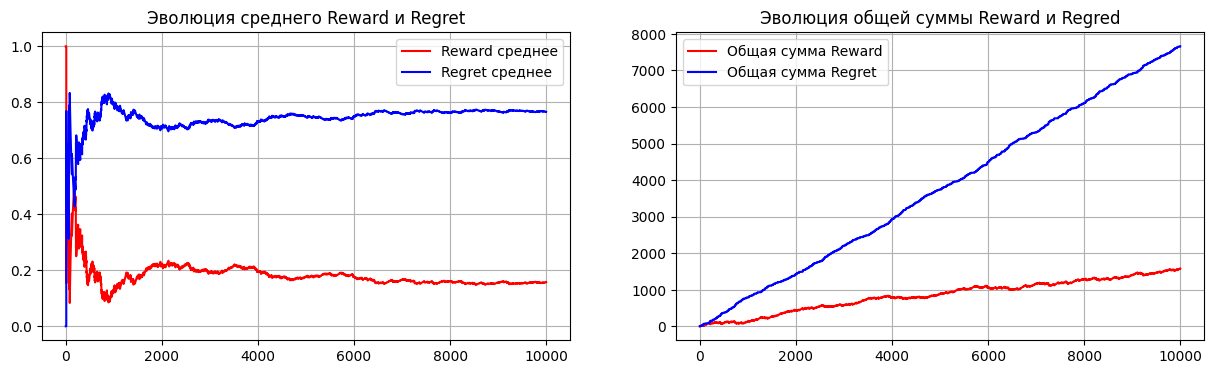

In [25]:
# Reward
reward_promedio = []
reward_total = 0
reward_total_vec = []

#Regret
regret_promedio = []
regret_total = 0
regret_total_vec = []

for i in tqdm(range(N)):
    cl_train.cliente()
    action = 1 # Всегда отдавайте должное
    reward = cl_train.get_reward(action)
    reward_total += reward
    regret = cl_train.getBestReward()-reward
    regret_total += regret
    reward_promedio.append(reward_total/(i+1)) # i+1 — количество итераций
    reward_total_vec.append(reward_total)
    regret_promedio.append(regret_total/(i+1))
    regret_total_vec.append(regret_total)

print("Reward promedio:", reward_total/N)
print("Regret promedio:", regret_total/N)
makePlots(reward_total_vec, reward_promedio, regret_total_vec, regret_promedio)

**ОТВЕТ:** В этом случае видно, что среднее вознаграждение немного выше по сравнению с тем, которое получается при выполнении случайных действий. В этом случае, всегда отдавая должное, мы видим, что это работает лучше, чем случайное поведение, однако в реальной жизни это не идеально.

#### 3. Алгоритм, который никогда не отдает должное

100%|██████████| 10000/10000 [00:00<00:00, 36764.73it/s]


Reward promedio: 0.0
Regret promedio: 0.9283


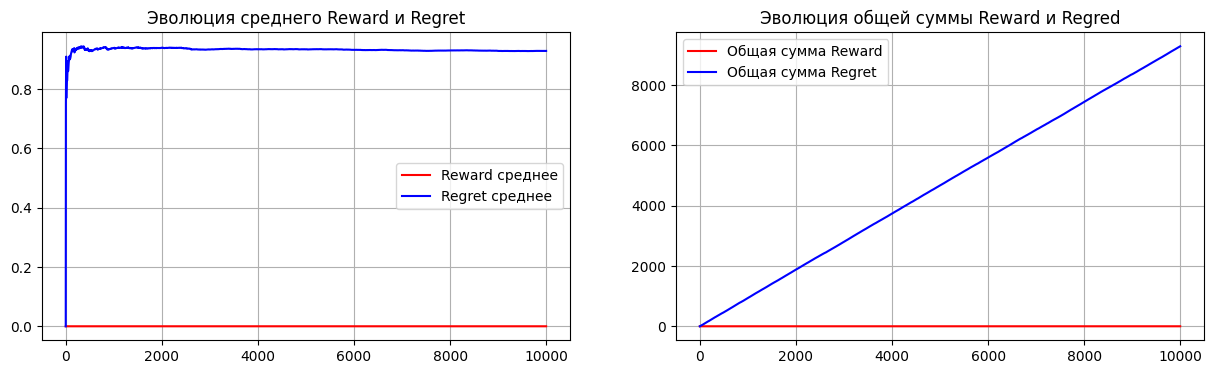

In [26]:
# Reward
reward_promedio = []
reward_total = 0
reward_total_vec = []

#Regret
regret_promedio = []
regret_total = 0
regret_total_vec = []

for i in tqdm(range(N)):
    cl_train.cliente()
    action = 0 # Никогда не дает кредит
    reward = cl_train.get_reward(action)
    reward_total += reward
    regret = cl_train.getBestReward()-reward
    regret_total += regret
    reward_promedio.append(reward_total/(i+1)) # i+1 — количество итераций
    reward_total_vec.append(reward_total)
    regret_promedio.append(regret_total/(i+1))
    regret_total_vec.append(regret_total)


print("Reward promedio:", reward_total/N)
print("Regret promedio:", regret_total/N)
makePlots(reward_total_vec, reward_promedio, regret_total_vec, regret_promedio)

**ОТВЕТ:** Полученные графики имеют большой смысл, поскольку среднее вознаграждение равно нулю, поскольку кредит никогда не выдается (выгода никогда не получается). В то время как сожаление стабилизируется на уровне 1.

### Задача 2: Обучить **неконтекстуального** многорукого бандита на тренировке. Рассчитайте те же метрики, что и в пункте 1. Какую стратегию изучает модель?

Далее реализуется неконтекстный $\epsilon$-жадный алгоритм с затуханием.

In [27]:
class EpsilonGreedy:
    def __init__(self, nActions, epsilon):
        self.nActions = nActions
        self.epsilon = epsilon
        self.nveces = np.zeros(nActions)
        self.suma_rs = np.zeros(nActions)
        self.Qs = -10*np.ones(nActions)

    def choose_action(self):
        if np.random.rand() < self.epsilon: # Мы исследовали?
            return np.random.choice(self.nActions)
        return np.argmax(self.Qs)
    
    def update(self, action, r): # с помощью этой функции агент «обучается»
        self.nveces[action] += 1 # прибавляем 1 к количеству раз выполнения действия «действие»
        self.suma_rs[action] += r # мы добавляем r к общей награде, связанной с этим действием
        self.Qs[action] = self.suma_rs[action] / self.nveces[action] # мы пересчитываем Q

    def setEpsilon(self, epsilon):
        self.epsilon = epsilon

Проведем обучение бесконтекстного агента $\epsilon$-жадного. В отличие от предыдущих алгоритмов, на этот раз модель учится предпринимать наилучшие действия (которые максимизируют $Q(a)$).

100%|██████████| 10000/10000 [00:00<00:00, 15847.79it/s]


Reward promedio: 0.0701
Regret promedio: 0.8529
Agent: 
 - Qs: [0.         0.10283116]
 - N Acciones: [3183. 6817.]
 - Total Rewards: [  0. 701.]


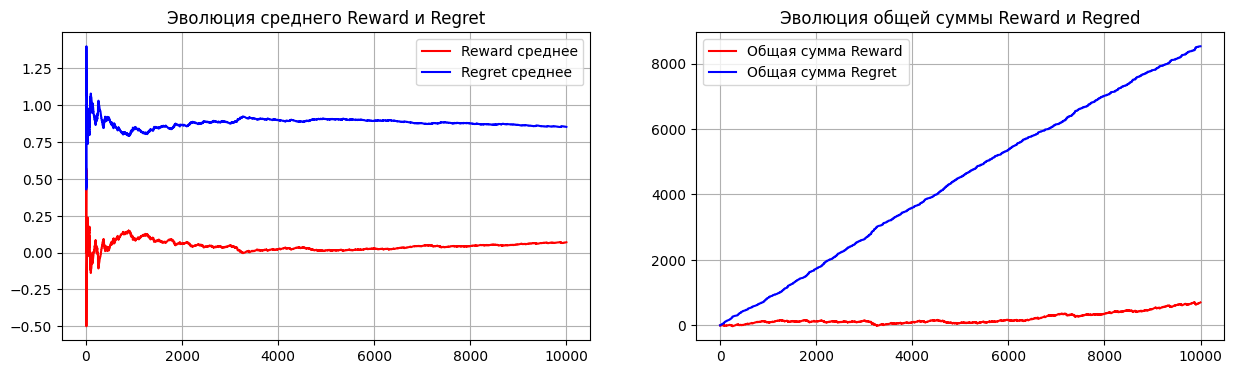

In [28]:
# Reward
reward_promedio = []
reward_total = 0
reward_total_vec = []

#Regret
regret_promedio = []
regret_total = 0
regret_total_vec = []

# Agente no contextual
agent = EpsilonGreedy(epsilon=1, nActions=len(available_actions))
decay_rate = 0.9999 # скорость распада

for i in tqdm(range(N)):
    cl_train.cliente()

    # Выбираем действие по жадному
    action = agent.choose_action()
    reward = cl_train.get_reward(action)

    # Обновляем Q агента
    agent.update(action, reward)

    reward_total += reward
    regret = cl_train.getBestReward()-reward
    regret_total += regret
    reward_promedio.append(reward_total/(i+1)) # i+1 — количество итераций
    reward_total_vec.append(reward_total)
    regret_promedio.append(regret_total/(i+1))
    regret_total_vec.append(regret_total)

    # Decaying epsilon
    agent.setEpsilon(agent.epsilon*decay_rate)

print("Reward promedio:", reward_total/N)
print("Regret promedio:", regret_total/N)
print("Agent: \n - Qs: {}\n - N Acciones: {}\n - Total Rewards: {}".format(agent.Qs, agent.nveces, agent.suma_rs))
makePlots(reward_total_vec, reward_promedio, regret_total_vec, regret_promedio)

**ОТВЕТ:** В этом случае стратегия, которую изучает модель, состоит в том, чтобы всегда отдавать должное, поскольку, если она не дает никакого вознаграждения, вознаграждение равно нулю, а если оно дается, получается положительное или отрицательное подкрепление (в среднем всегда лучше отдать должное). Однако можно видеть, что среднее вознаграждение ниже, чем у алгоритма, который всегда дает кредит, это потому, что первоначально агент начинает исследовать, а затем только эксплуатирует (обнаружив, что всегда давать кредит в среднем лучше, чем никогда его не давать). .

### Задание 3: Обучить линейного контекстного многорукого бандита на тренировке. Рассчитайте те же метрики, что и в предыдущих пунктах.

In [29]:
from space_bandits import LinearBandits

In [30]:
features = np.array(cl_train.get_context().index.tolist())
n_features = len(features)
print('Features: {}\nnFeatures: {}'.format(features, n_features))

Features: ['RevolvingUtilizationOfUnsecuredLines' 'age'
 'NumberOfTime30-59DaysPastDueNotWorse' 'DebtRatio' 'MonthlyIncome'
 'NumberOfOpenCreditLinesAndLoans' 'NumberOfTimes90DaysLate'
 'NumberRealEstateLoansOrLines' 'NumberOfTime60-89DaysPastDueNotWorse'
 'NumberOfDependents']
nFeatures: 10


100%|██████████| 10000/10000 [00:16<00:00, 616.23it/s]


Reward promedio: 0.5104
Regret promedio: 0.4144


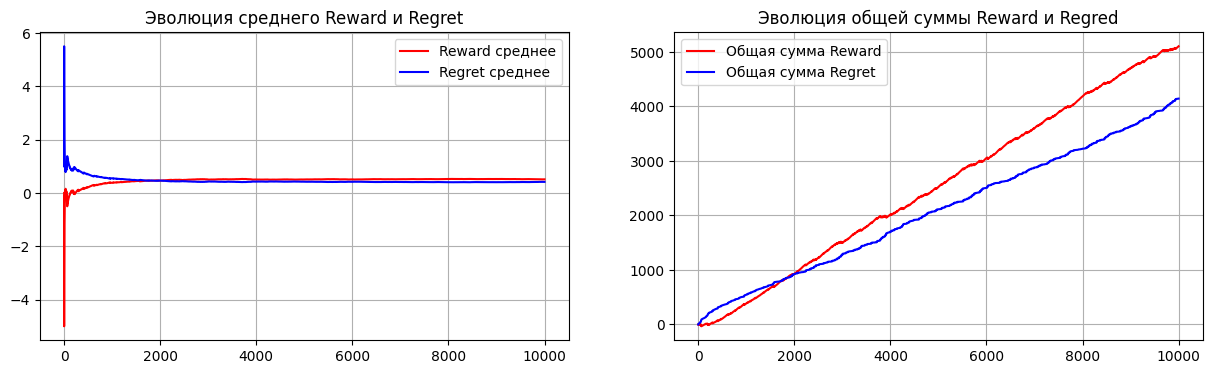

/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
 35%|█████████████▊                         | 353/1000 [00:00<00:01, 583.11it/s]/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer key

/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce

/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
 47%|██████████████████▎                    | 471/1000 [00:00<00:00, 582.46it/s]/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer key

/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce

/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce

 58%|██████████████████████▊                | 585/1000 [00:01<00:00, 500.40it/s]/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer key

/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce

/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce

/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce

/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce

/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce

/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce

/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce

/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce

/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce

/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce

 89%|██████████████████████████████████▋    | 889/1000 [00:01<00:00, 326.67it/s]/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer key

/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce

/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce

/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce

/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce

In [31]:
# Reward
reward_promedio = []
reward_total = 0
reward_total_vec = []

#Regret
regret_promedio = []
regret_total = 0
regret_total_vec = []

# Agente contextual lineal
agent = LinearBandits(len(available_actions), n_features, initial_pulls=100)

for i in tqdm(range(N)):
    cl_train.cliente()

    # Мы получаем контекст
    contexto = cl_train.get_context()

    # Выбираем действие по контексту
    action = agent.action(np.array(contexto))
    reward = cl_train.get_reward(action)

    # Обновляем модель
    agent.update(contexto, action, reward)

    reward_total += reward
    regret = cl_train.getBestReward()-reward
    regret_total += regret
    reward_promedio.append(reward_total/(i+1)) # i+1 — количество итераций
    reward_total_vec.append(reward_total)
    regret_promedio.append(regret_total/(i+1))
    regret_total_vec.append(regret_total)

print("Reward promedio:", reward_total/N)
print("Regret promedio:", regret_total/N)
makePlots(reward_total_vec, reward_promedio, regret_total_vec, regret_promedio)

**ОТВЕТ:** В этом случае видно, что при использовании линейной модели, основанной на контексте, результаты получаются значительно выше, чем у предыдущих алгоритмов. Мы получаем среднее вознаграждение и сожаление 0,51 и 0,41 соответственно. Кроме того, можно отметить, что модель выполняет свою работу, поскольку, зная контекст каждого клиента, можно сделать лучший вывод о том, отдавать должное или нет, получая большую общую награду (большую, чем сожаление).

### Задача 4. Рассчитайте для некоторых обучающих клиентов Q, заданную моделью для каждого действия. Проверьте, получаются ли у вас одинаковые значения, рассчитав их самостоятельно. Проверьте, является ли действие, выбранное моделью, самым высоким Q.

Ниже приведены Q, полученные с помощью модели:

In [32]:
linear_Qs = agent.mu
linear_Qs

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-8.98625238e-01,  7.59130680e-03, -4.08815658e-01, -3.95205649e-03,
         1.64308523e-06, -7.07399651e-03, -1.20216308e+00, -3.44177718e-02,
        -1.80452968e+00,  7.73842762e-04,  6.46147300e-01])]

Значения Q будут рассчитаны для 3 клиентов:

**Расчет Q для первого клиента:**

In [33]:
cl_train.cliente()
contexto = cl_train.get_context()
print('Id: {}\nContexto: \n{}'.format(cl_train.i, contexto))

Id: 50002
Contexto: 
RevolvingUtilizationOfUnsecuredLines       0.102297
age                                       46.000000
NumberOfTime30-59DaysPastDueNotWorse       0.000000
DebtRatio                                  0.279188
MonthlyIncome                           6500.000000
NumberOfOpenCreditLinesAndLoans            6.000000
NumberOfTimes90DaysLate                    0.000000
NumberRealEstateLoansOrLines               1.000000
NumberOfTime60-89DaysPastDueNotWorse       0.000000
NumberOfDependents                         3.000000
Name: 88275, dtype: float64


Ожидаемая стоимость модели:

В этом случае кредит будет предоставлен клиенту.

In [34]:
print('Qs оценивается по модели:',agent.expected_values(np.array(contexto)))

Qs оценивается по модели: [0.         0.83845758]


Ручной расчет:

Важно отметить, что Q модели имеют размерности [2, 11], поскольку последнее значение соответствует пересечению линейной модели (у нас есть 10 контекстных переменных). Можно отметить, что мы вручную получили тот же результат, что и модель.

In [35]:
# Q имеет 11 значений, так как последнее значение соответствует перехвату
# поэтому мы инициализируем сумму qs с помощью перехвата
total_qs = [linear_Qs[0][len(contexto)],linear_Qs[1][len(contexto)]]
for i in range(len(available_actions)):
    for j in range(len(contexto)):
        total_qs[i]+=agent.mu[i][j]*contexto.iloc[j]
print('Вопросы, полученные вручную:',total_qs)

Вопросы, полученные вручную: [0.0, 0.8384575807370819]


Действие, которое предпринимает модель, — это отдать должное (1).

In [36]:
print('Действия, предпринятые моделью:',agent.action(np.array(contexto)))

Действия, предпринятые моделью: 1


**Расчет Q для второго клиента:**

In [37]:
cl_train.cliente()
contexto = cl_train.get_context()
print('Id: {}\nКонтекст: \n{}'.format(cl_train.i, contexto))
print('\n-------------------------\n')
print('Qs оценивается по модели:',agent.expected_values(np.array(contexto)))
# Q имеет 11 значений, поскольку последнее значение соответствует перехвату, поэтому мы инициализируем сумму qs с помощью перехвата
total_qs = [linear_Qs[0][len(contexto)],linear_Qs[1][len(contexto)]]
for i in range(len(available_actions)):
    for j in range(len(contexto)):
        total_qs[i]+=agent.mu[i][j]*contexto.iloc[j]
print('Qs получено вручную:',total_qs)
print('Действие, предпринятое моделью:',agent.action(np.array(contexto)))

Id: 50003
Контекст: 
RevolvingUtilizationOfUnsecuredLines        0.459051
age                                        51.000000
NumberOfTime30-59DaysPastDueNotWorse        0.000000
DebtRatio                                   0.161811
MonthlyIncome                           10400.000000
NumberOfOpenCreditLinesAndLoans             8.000000
NumberOfTimes90DaysLate                     0.000000
NumberRealEstateLoansOrLines                1.000000
NumberOfTime60-89DaysPastDueNotWorse        0.000000
NumberOfDependents                          4.000000
Name: 80943, dtype: float64

-------------------------

Qs оценивается по модели: [0.         0.54932356]
Qs получено вручную: [0.0, 0.5493235583160175]
Действие, предпринятое моделью: 1


**Расчет Q для третьего клиента:**

In [38]:
cl_train.cliente()
contexto = cl_train.get_context()
print('Id: {}\nContexto: \n{}'.format(cl_train.i, contexto))
print('\n-------------------------\n')
print('Qs оценивается по модели:',agent.expected_values(np.array(contexto)))
# Q имеет 11 значений, поскольку последнее значение соответствует перехвату, поэтому мы инициализируем сумму qs с помощью перехвата
total_qs = [linear_Qs[0][len(contexto)],linear_Qs[1][len(contexto)]]
for i in range(len(available_actions)):
    for j in range(len(contexto)):
        total_qs[i]+=agent.mu[i][j]*contexto.iloc[j]
print('Qs получено вручную:',total_qs)
print('Действие, предпринятое моделью:',agent.action(np.array(contexto)))

Id: 50004
Contexto: 
RevolvingUtilizationOfUnsecuredLines       0.423534
age                                       37.000000
NumberOfTime30-59DaysPastDueNotWorse       1.000000
DebtRatio                                  0.184272
MonthlyIncome                           3000.000000
NumberOfOpenCreditLinesAndLoans            4.000000
NumberOfTimes90DaysLate                    0.000000
NumberRealEstateLoansOrLines               0.000000
NumberOfTime60-89DaysPastDueNotWorse       0.000000
NumberOfDependents                         0.000000
Name: 14372, dtype: float64

-------------------------

Qs оценивается по модели: [0.         0.11351702]
Qs получено вручную: [0.0, 0.11351701670314893]
Действие, предпринятое моделью: 1


### Задача 5: Рассчитайте производительность тестируемого алгоритма многорукого бандита. Сравните ее с тестовой контрольной группой (оставьте 10% тестовых клиентов в качестве контрольной группы).

Далее мы оставляем 10% тестовых данных для контроля.

In [39]:
df_test2, df_control = train_test_split(df, random_state=1, test_size=0.1, stratify=df["SeriousDlqin2yrs"])

In [40]:
cl_test2 = clientes(df_test2)
cl_control = clientes(df_control)

In [41]:
cl_test2.get_context()

RevolvingUtilizationOfUnsecuredLines       0.092123
age                                       52.000000
NumberOfTime30-59DaysPastDueNotWorse       2.000000
DebtRatio                                  0.384418
MonthlyIncome                           6250.000000
NumberOfOpenCreditLinesAndLoans           11.000000
NumberOfTimes90DaysLate                    0.000000
NumberRealEstateLoansOrLines               2.000000
NumberOfTime60-89DaysPastDueNotWorse       0.000000
NumberOfDependents                         2.000000
Name: 104896, dtype: float64

Мы протестировали производительность модели на данных test2 (80% исходных тестовых данных).

100%|██████████| 10000/10000 [00:05<00:00, 1921.89it/s]


Reward promedio: 0.545
Regret promedio: 0.3851


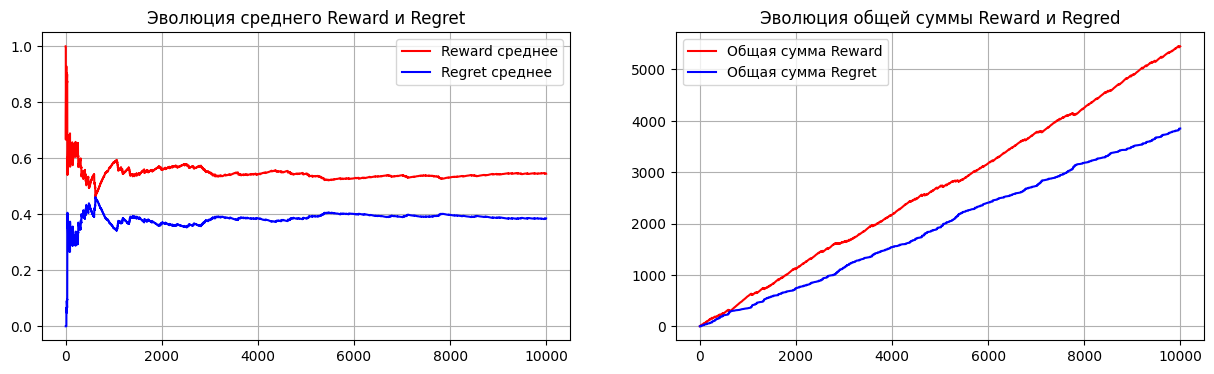

In [42]:
# Reward
reward_promedio = []
reward_total = 0
reward_total_vec = []

#Regret
regret_promedio = []
regret_total = 0
regret_total_vec = []

for i in tqdm(range(N)):
    cl_test2.cliente()

    # Мы получаем контекст
    contexto = cl_test2.get_context()

    # Выбираем действие по контексту
    action = agent.action(np.array(contexto))
    reward = cl_test2.get_reward(action)

    # Обновляем модель
    reward_total += reward
    regret = cl_test2.getBestReward()-reward
    regret_total += regret
    reward_promedio.append(reward_total/(i+1)) # i+1 — количество итераций
    reward_total_vec.append(reward_total)
    regret_promedio.append(regret_total/(i+1))
    regret_total_vec.append(regret_total)

print("Reward promedio:", reward_total/N)
print("Regret promedio:", regret_total/N)
makePlots(reward_total_vec, reward_promedio, regret_total_vec, regret_promedio)

**ОТВЕТ:** Можно отметить, что производительность модели сохраняется на данных теста2, даже среднее вознаграждение получается немного выше вознаграждения, полученного при обучении.

Теперь мы проведем эксперимент с контрольной группой (кредиты будут выдаваться случайным образом).

100%|██████████| 10000/10000 [00:00<00:00, 18691.68it/s]


Reward promedio: 0.0858
Regret promedio: 0.8414


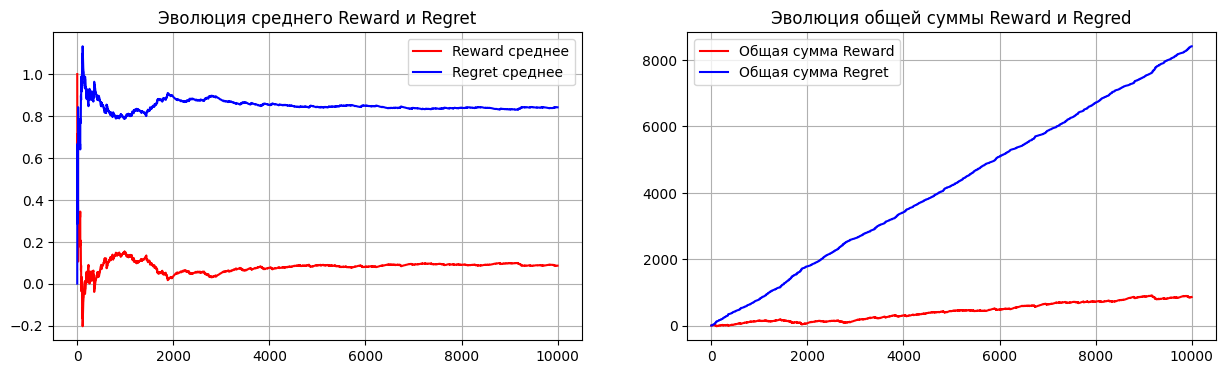

In [43]:
# Reward
reward_promedio = []
reward_total = 0
reward_total_vec = []

#Regret
regret_promedio = []
regret_total = 0
regret_total_vec = []

for i in tqdm(range(N)):
    cl_control.cliente()
    action = np.random.choice(len(available_actions))
    reward = cl_control.get_reward(action)
    reward_total += reward
    regret = cl_control.getBestReward()-reward
    regret_total += regret
    reward_promedio.append(reward_total/(i+1)) # i+1 — количество итераций
    reward_total_vec.append(reward_total)
    regret_promedio.append(regret_total/(i+1))
    regret_total_vec.append(regret_total)


print("Reward promedio:", reward_total/N)
print("Regret promedio:", regret_total/N)
makePlots(reward_total_vec, reward_promedio, regret_total_vec, regret_promedio)

**ОТВЕТ:** Видно, что при случайном предоставлении кредитов в контрольной группе результаты значительно ниже результатов, полученных с использованием ранее обученной модели, что показывает, что модель работает, максимизируя вознаграждение, полученное при выполнении соответствующие действия.

### Задача 6: Получить интерпретируемость модели. На какие переменные вы обращаете внимание при принятии решения?

Далее мы будем использовать тестовые данные, чтобы получить интерпретируемость модели.

In [44]:
X_test = df_test.copy()
y_test = list(df_test['SeriousDlqin2yrs'])
X_test.drop(columns=['SeriousDlqin2yrs'], inplace=True)
print(X_test.shape)
X_test.head()

(32365, 10)


,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
86820,0.429702,59,3,0.201624,13420.0,13,0,2,0,2.0
63852,0.717724,53,2,0.508987,8400.0,20,0,2,0,1.0
109304,1.000000,33,0,0.281594,13000.0,11,0,1,1,2.0
131988,0.889311,57,0,0.273563,6747.0,5,1,1,0,1.0
125320,0.271875,53,1,0.510943,9000.0,10,0,2,0,4.0


Сохраняем прогнозы агента.

In [45]:
taked_actions = []
for i in range(len(X_test)):
    contexto = X_test.iloc[i]
    action = agent.action(np.array(contexto))
    taked_actions.append(action)
print('Всего предпринятых действий:',len(taked_actions))

Всего предпринятых действий: 32365


Теперь мы собираемся обучить дерево решений с целью интерпретации модели, полученной агентом (суррогатная модель).

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = DecisionTreeClassifier(max_leaf_nodes=5, random_state=1)
clf = clf.fit(X_test,taked_actions)

Далее мы визуализируем наиболее важные узлы обученного дерева решений (суррогатной модели).

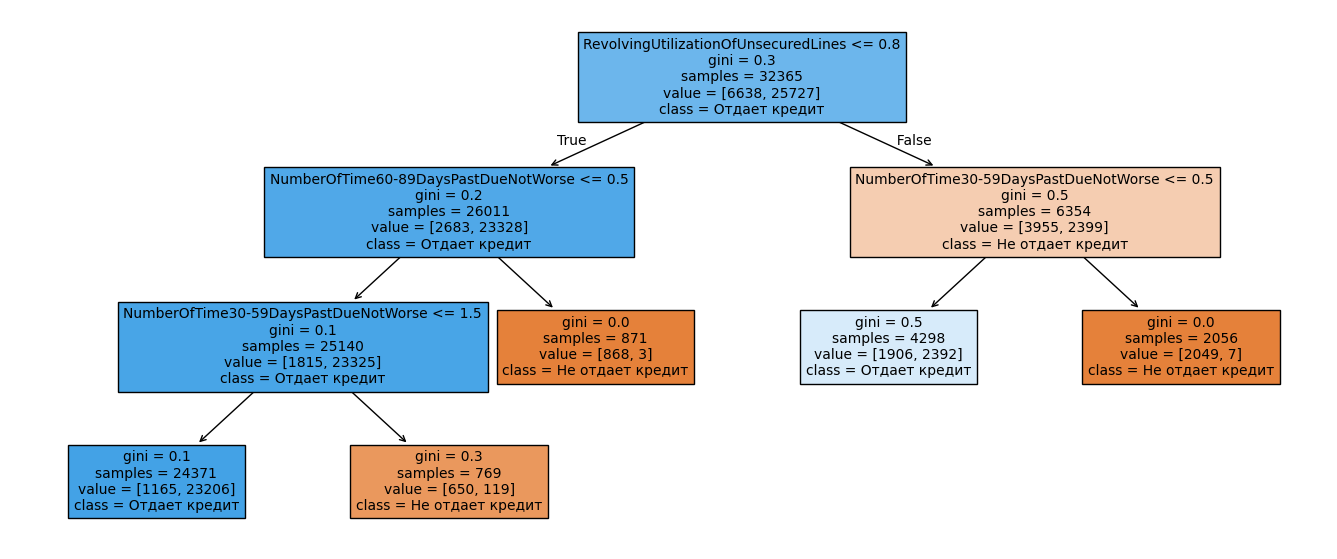

In [48]:
matplotlib.rc('figure', figsize=(17, 7))
tree.plot_tree(clf, 
               feature_names=list(X_test.columns),
               class_names=['Не отдает кредит', 'Отдает кредит'],
               filled=True,
               proportion = False,
               precision = 1,
               fontsize = 10)
plt.show()

**ОТВЕТ:** Мы видим, что обученное дерево использует 3 переменные для разделения данных и, таким образом, решает, следует ли отдавать должное. Переменные:
- RevolvingUtilizationOfUnsecuredLines: эту переменную имеет смысл использовать, поскольку она связана с емкостью, которую клиент имеет по различным кредитным линиям: чем больше их емкость, тем выше вероятность предоставления им кредита.
- NumberOfTime60-89DaysPastDueNotWorse: эта переменная указывает количество раз, когда заемщик не выполнял свои обязательства в период от 60 до 89 дней. В этом случае, если он не был неплатежеспособным в течение этого количества дней, существует большая вероятность предоставления кредита. .
- NumberOfTime30-59DaysPastDueNotWorse: эта переменная указывает количество раз, когда заемщик не выполнял свои обязательства в течение периода от 30 до 59 дней. В этом случае, если он не был просроченным в течение этого количества дней, существует большая вероятность предоставления кредита. .

### Задача 7: Что произойдет в предыдущих пунктах, если теперь штраф, когда банк выдает кредит неплательщику клиента, равен -1? Что, если штраф станет еще меньше?

Далее мы определяем функцию ***runExperiment()***, которая позволит нам провести несколько экспериментов, варьируя штраф.

In [49]:
def runExperiment(clientes: clientes, agent: LinearBandits, N = 10000, training_mode = True):
    '''
    Эта функция запускает эксперимент для данного клиента и агента, что позволяет нам
     получить те же показатели, которые использовались ранее.
    
     Параметры:
     - клиенты: соответствует классу клиентов.
     - агент: соответствует агенту, использующему класс LinearBandits.
     - N: соответствует первым N клиентам, над которыми агент выполняет действие.
     - Training_mode: Если это правда, веса (Q) агента обновляются в процессе,
     В противном случае получаются только действия, заданные агентом, и Q не обновляется.

    '''

    # Reward
    reward_promedio, reward_total, reward_total_vec  = [], 0, []
    #Regret
    regret_promedio, regret_total, regret_total_vec = [], 0, []

    # Линейный контекстный агент
    ag = agent

    for i in tqdm(range(N)):
        clientes.cliente()

        # Мы получаем контекст
        contexto = clientes.get_context()

        # Выбираем действие по контексту
        action = ag.action(np.array(contexto))
        reward = clientes.get_reward(action)

        # Обновляем модель
        if training_mode:
            ag.update(contexto, action, reward)

        reward_total += reward
        regret = clientes.getBestReward()-reward
        regret_total += regret
        reward_promedio.append(reward_total/(i+1)) # i+1 — количество итераций
        reward_total_vec.append(reward_total)
        regret_promedio.append(regret_total/(i+1))
        regret_total_vec.append(regret_total)

    print("Reward promedio:", reward_total/N)
    print("Regret promedio:", regret_total/N)
    makePlots(reward_total_vec, reward_promedio, regret_total_vec, regret_promedio)

Тестируются 3 дополнительных значения штрафа [-1, -0,5, -0,1].

1. Штраф $-1$.

**ОТВЕТ:** Видно, что модель явно улучшилась, потому что за счет уменьшения штрафа у нас появляется более «рискованный» агент при выдаче кредитов. То есть, в отличие от предыдущей модели, этот агент выдает большее количество кредитов (что делает его менее чувствительным к контексту).

100%|██████████| 10000/10000 [00:15<00:00, 646.06it/s]


Reward promedio: 0.8559
Regret promedio: 0.0764


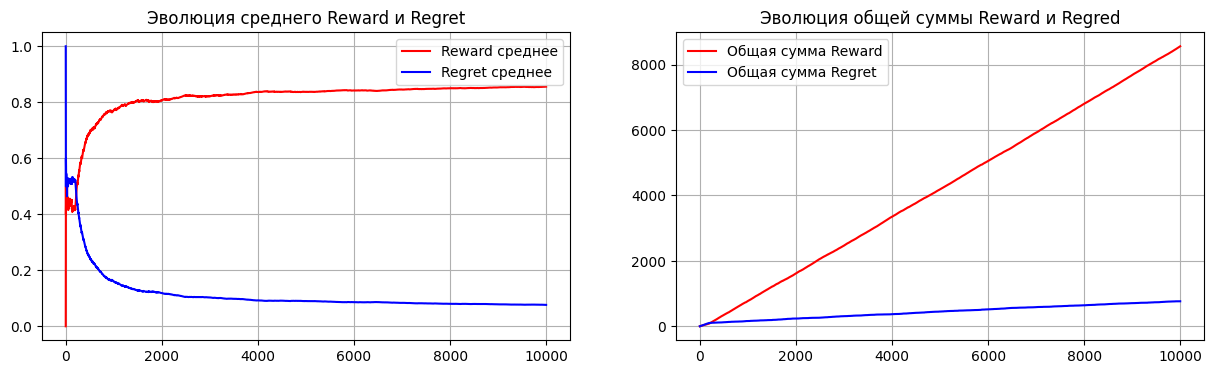

In [50]:
cl_train_2 = clientes(df_train, penalty=-1)
lb2 = LinearBandits(len(available_actions), n_features, initial_pulls=100)
matplotlib.rc('figure', figsize=(15, 4))
runExperiment(cl_train_2, lb2)

2. Штраф $-0,5$.

**ОТВЕТ:** Опять же, за счет уменьшения штрафа при выдаче кредита (и клиента, впадающего в дефолт) он имеет меньший вес (штраф), поэтому модель имеет тенденцию выдавать больше кредитов, улучшая среднее вознаграждение и минимизируя сожаление. .

100%|██████████| 10000/10000 [00:16<00:00, 619.24it/s]


Reward promedio: 0.8878
Regret promedio: 0.0445


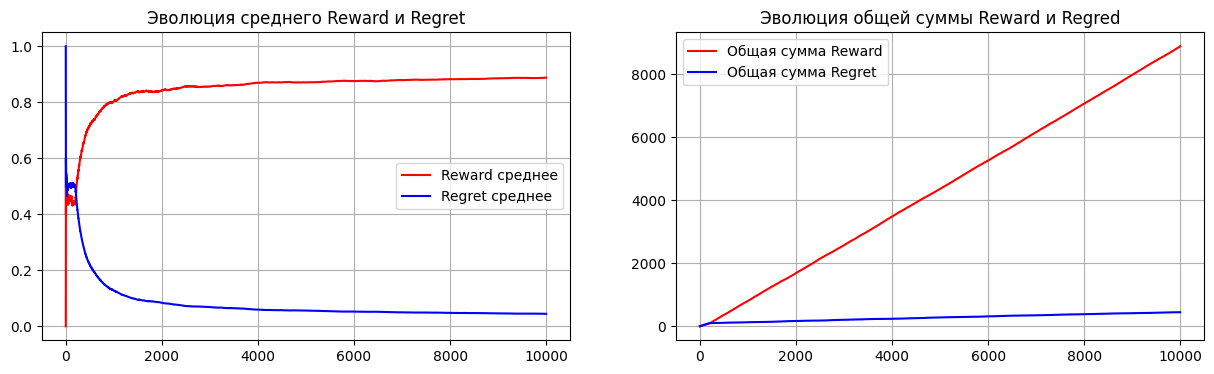

In [51]:
cl_train_3 = clientes(df_train, penalty=-0.5)
lb3 = LinearBandits(len(available_actions), n_features, initial_pulls=100)
matplotlib.rc('figure', figsize=(15, 4))
runExperiment(cl_train_3, lb3)

3. Штраф $-0,1$

**ОТВЕТ:** Аналогично, снижая штраф дальше, мы видим, что получаемая награда имеет тенденцию к улучшению. Важно учитывать, что мы работаем с очень несбалансированным набором данных (имеем мало клиентов по умолчанию $7$%), поэтому в этом случае сильное снижение штрафа (даже до нуля) не сильно наказывается, поэтому лучше всегда отдайте должное. Однако при более сбалансированном наборе данных (и в реальной жизни) слишком сильное снижение штрафа может отрицательно повлиять на получаемое вознаграждение.

Более того, если мы сравним эту модель с алгоритмом, который всегда дает кредит (со штрафом в размере -0,1 доллара), мы увидим, что получим аналогичные результаты. В данном конкретном примере выбор соответствующего наказания имеет важное значение.

100%|██████████| 10000/10000 [00:15<00:00, 627.71it/s]


Reward promedio: 0.9146199999999893
Regret promedio: 0.01767999999999963


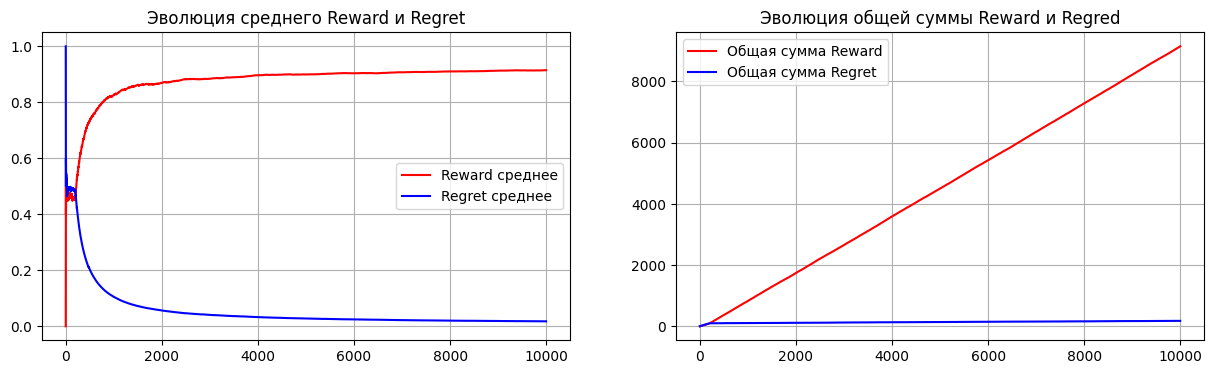

In [52]:
cl_train_4 = clientes(df_train, penalty=-0.1)
lb4 = LinearBandits(len(available_actions), n_features, initial_pulls=100)
matplotlib.rc('figure', figsize=(15, 4))
runExperiment(cl_train_4, lb4)

### Задача 8: Оптимизируйте свою систему, выбрав переменные.

Затем мы получаем копию набора обучающих данных.

In [53]:
X_train = df_train.copy()
y_train = df_train['SeriousDlqin2yrs']
X_train.drop(columns=['SeriousDlqin2yrs'], inplace=True)
print(df_train.shape)
df_train.head()

(75518, 11)


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
135262,0,0.064833,59,0,0.156957,16666.0,5,0,1,0,2.0
14308,0,0.209079,30,0,0.129946,2400.0,7,0,0,0,0.0
124448,0,0.411271,58,0,0.150311,22000.0,11,0,1,0,0.0
113232,0,0.929365,33,1,0.281286,6000.0,6,0,1,0,0.0
83942,0,0.359039,50,0,0.323219,14500.0,7,0,2,0,2.0


Мы получаем действия, предпринятые агентом (со штрафом в $-1$) для обучающих данных.

In [54]:
taked_actions = []
for i in range(len(X_train)):
    contexto = X_train.iloc[i]
    action = lb2.action(np.array(contexto))
    taked_actions.append(action)
print('Всего предпринятых действий:',len(taked_actions))

Всего предпринятых действий: 75518


Теперь мы обучаем случайный лес (суррогатную модель) для получения наиболее важных переменных для агента.

In [55]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=1)
forest.fit(X_train, taked_actions)

RandomForestClassifier(random_state=1)

Теперь мы получаем график с примесью разных переменных. В этом случае мы видим, что наиболее важные переменные (переменные, которые больше всего уменьшают примеси) расположены в порядке убывания.

Text(0, 0.5, 'Среднее уменьшение примесей')

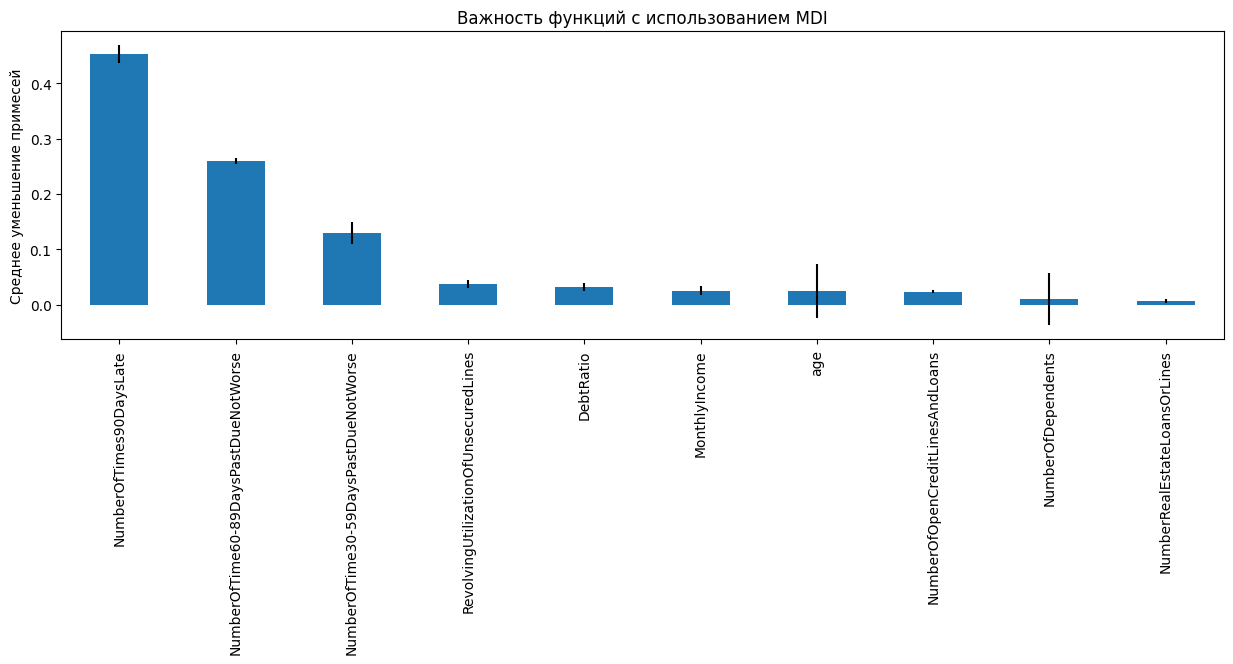

In [56]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=X_train.columns)
forest_importances = forest_importances.sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Важность функций с использованием MDI")
ax.set_ylabel("Среднее уменьшение примесей")

Мы берем порог с целью взять наиболее важные переменные, в данном случае мы решили сохранить первые 3 переменные (приняв порог 0,1).

In [57]:
mdi_threshold = 0.1
fs = forest_importances[forest_importances >= mdi_threshold]
fs

NumberOfTimes90DaysLate                 0.452341
NumberOfTime60-89DaysPastDueNotWorse    0.258694
NumberOfTime30-59DaysPastDueNotWorse    0.129735
dtype: float64

In [58]:
fs_index =  ['SeriousDlqin2yrs'] + list(fs.index)
df_train_selected = df_train.copy()
df_train_selected = df_train_selected[fs_index]
df_train_selected.head()

,SeriousDlqin2yrs,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTime30-59DaysPastDueNotWorse
135262,0,0,0,0
14308,0,0,0,0
124448,0,0,0,0
113232,0,0,0,1
83942,0,0,0,0


Мы запускаем эксперимент с обучающими данными (с выбранными переменными) и со штрафом $-1$.

100%|██████████| 10000/10000 [00:12<00:00, 770.52it/s]


Reward promedio: 0.8568
Regret promedio: 0.0755


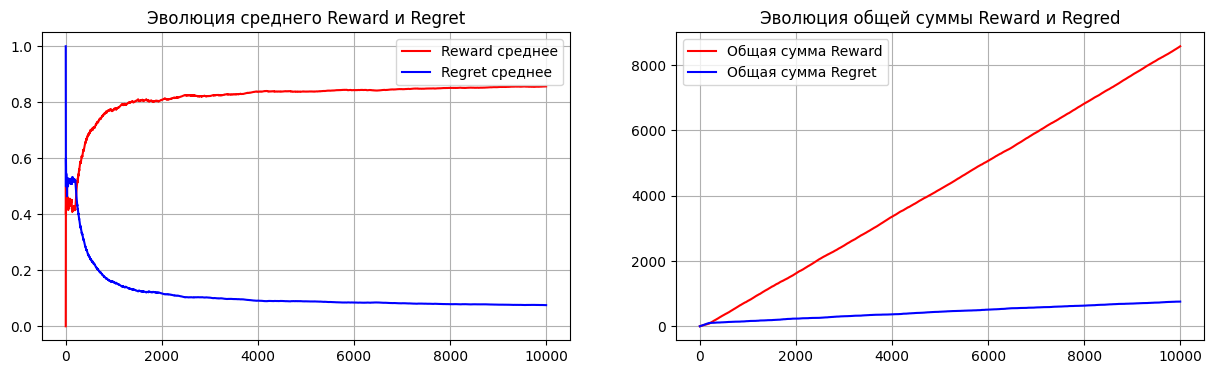

In [59]:
cl_selected = clientes(df_train_selected, penalty=-1)
lb_selected = LinearBandits(len(available_actions), len(fs_index) - 1 , initial_pulls=100)
runExperiment(cl_selected, lb_selected)

**ОТВЕТ:** Как видно из показателей и графиков (в данных обучения), представленных при использовании первых трех наиболее важных переменных, производительность агента сохраняется. То есть, несмотря на уменьшение количества используемых переменных, производительность агента не пострадает. Используя меньше переменных, модель становится более эффективной (за счет выполнения оптимизации).

Теперь можно увидеть результаты оптимизированной модели на тестовых данных. Полученные результаты согласуются с результатами, полученными при обучении, сохраняя немного лучшие показатели вознаграждения и сожаления, чем при обучении, это подтверждает, что наша модель выполняет адекватную работу.

100%|██████████| 10000/10000 [00:04<00:00, 2122.98it/s]


Reward promedio: 0.8586
Regret promedio: 0.0683


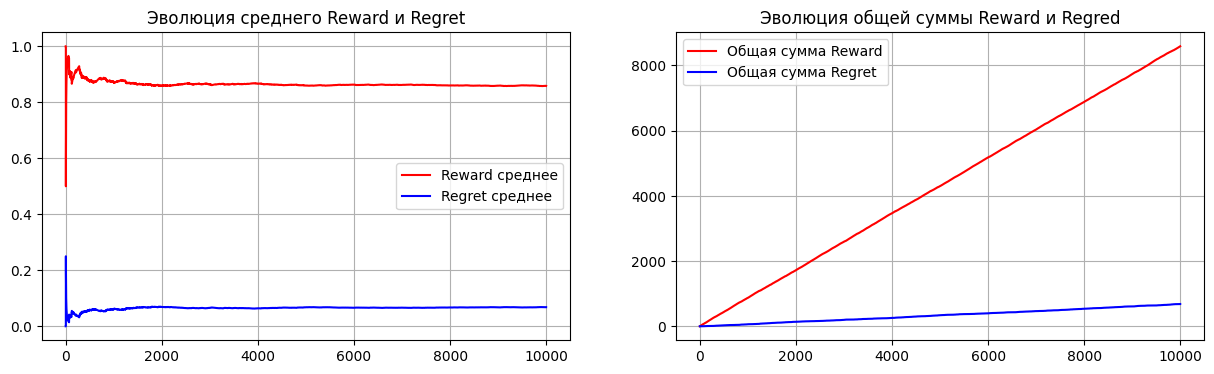

In [60]:
cl_selected_test = clientes(df_test[fs_index], penalty=-1)
runExperiment(cl_selected_test, lb_selected, training_mode=False)

Дополнительно на тестовых данных проводится анализ действий агента.

In [61]:
taked_actions = []
res = []
for i in tqdm(range(len(X_test))):
    contexto = X_test.iloc[i][fs_index[1:]]
    action = lb_selected.action(np.array(contexto))
    taked_actions.append(action)
    if action == 1:# отдал должное
        if y_test[i] == 0: # Клиент оплатил кредит
            res.append('Платить')
        else:# Клиент НЕ оплатил кредит
            res.append('Не платить')
    else: # NO Dió el crédito
        if y_test[i] == 0: # Клиент оплатил кредит
            res.append('Платить')
        else:# Клиент НЕ оплатил кредит
            res.append('Не платить')


print('Всего предпринятых действий:',len(taked_actions))

100%|██████████| 32365/32365 [00:15<00:00, 2131.19it/s]

Всего предпринятых действий: 32365


Агент выдал $98\%$ кредитов, в то время как только $2\%$ клиентов не получили кредит.

In [62]:
resultados = pd.DataFrame({'Действие': taked_actions, 'Результат': res})

print('Кредиты выданы и не выданы')
general_res = resultados.groupby(['Действие']).size().reset_index(name='count')
general_res['Процент'] = general_res['count'] * 100 / len(taked_actions)
general_res

Кредиты выданы и не выданы


,Действие,count,Процент
0,0,546,1.687008
1,1,31819,98.312992


Модель имела ошибку 2,251 (7%) между клиентами, которым модель не предоставила кредит (но заплатила бы) и теми, которым предоставили кредит (но не заплатили). Эти ошибки типов 1 и 2 можно контролировать, увеличивая или уменьшая штраф модели. Например, если бы мы увеличили штраф, ошибка 1-го типа была бы меньше (поскольку это была бы более ограничительная модель при выдаче кредита), но ошибка 2-го типа увеличилась бы (поскольку у нас было бы больше клиентов, которым не предоставили кредит). кредит, но заплатил бы).

In [63]:
general_res_2 = resultados.groupby(['Действие', 'Результат']).size().reset_index(name='value')
general_res_2.pivot(index='Действие', columns='Результат', values='value')

Результат,Не платить,Платить
Действие,,
0,339,207
1,2047,29772


Далее мы рассчитываем стоимость упущенной возможности.:

$$\textrm{Стоимость упущенной возможности} = \textrm{Ценность принесенного в жертву лучшего действия} - \textrm{Стоимость выбранной акции} .$$

In [64]:
best_actions = [1 if x == 0 else 0 for x in y_test] # Мы инвертируем y_test так, чтобы 1 представляло действие, которое должно было быть выполнено (основная истина).
lost_opportunity_cost = [x - y for x, y in zip(best_actions, taked_actions)]
print('Стоимость упущенной возможности: ', np.sum(lost_opportunity_cost))

Стоимость упущенной возможности:  -1840


Теперь мы показываем матрицу путаницы лучших действий (обратных переменной _SeriousDlqin2yrs_) и действий, предпринятых агентом.

Text(0.5, 1.0, 'Конфьюжн матрица')

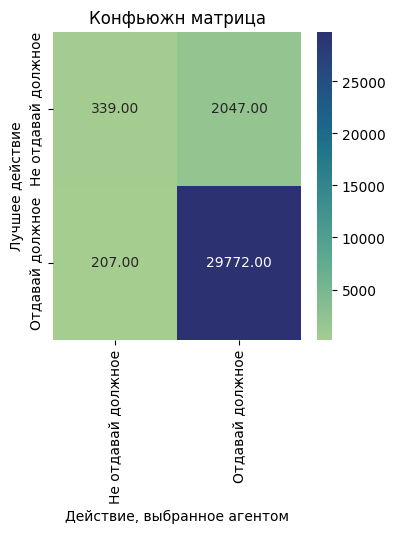

In [65]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sn

matplotlib.rc('figure', figsize=(4, 4))

df_cm = pd.DataFrame(confusion_matrix(best_actions, taked_actions))
df_cm.columns = ['Не отдавай должное', 'Отдавай должное']
df_cm.index  = ['Не отдавай должное', 'Отдавай должное']
sn.heatmap(df_cm, annot=True, fmt=".2f", cmap="crest")
plt.xlabel('Действие, выбранное агентом')
plt.ylabel('Лучшее действие')
plt.title('Конфьюжн матрица')

Дополнительно мы получаем сводку некоторых показателей. Например, мы видим, что полученная точность действий агента составляет $93\%$, что является хорошим показателем. Однако при наличии крайне несбалансированных данных этот показатель не является хорошим показателем. Например, если мы посмотрим на класс 0 (не дает оценки), мы получим $60\%$, $17\%$, $26\%$ для точности, полноты и гармоник. имею в виду получение плохих показателей. Следует подчеркнуть, что эти метрики можно улучшить (в зависимости от цели владельца продукта), чтобы в большей или меньшей степени наказывать за выдачу кредита в соответствии со значением штрафа (отрицательного вознаграждения) агента.

В этом случае было бы целесообразно увеличить штраф, чтобы иметь более ограничительную модель при выдаче кредита (увеличение ошибки 1-го рода).

In [66]:
print(classification_report(best_actions, taked_actions))

              precision    recall  f1-score   support

           0       0.62      0.14      0.23      2386
           1       0.94      0.99      0.96     29979

    accuracy                           0.93     32365
   macro avg       0.78      0.57      0.60     32365
weighted avg       0.91      0.93      0.91     32365



### Задача 9: (Необязательно). Изучите другие библиотеки, позволяющие реализовать нелинейных контекстных многоруких бандитов. Возьмите один из них и снова выполните задание 3.